In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import pyqg
from pyqg import diagnostic_tools as tools

In [2]:
year = 24*60*60*360.
N = 128 # number of spatial grids
m = pyqg.QGModel(nx=N, ny=N, L=1257000, dt=4000, tmax=40*year, twrite=10000, tavestart=5*year,
                rek=1.157e-6, rd=126000, delta=1, U1=0.025, U2=-0.025)
# m = pyqg.QGModel(nx=N, ny=N, L=1257000, dt=4000, tmax=10*year, twrite=10000, tavestart=5*year,
#                 beta= 6.25*1e-12, rek=1.157e-6, rd=126000, delta=1, U1=0.025, U2=-0.025)
q1_0 = .0001*np.random.rand(N,N)
q1_0 = q1_0 - np.mean(q1_0)
q2_0 = q1_0
m.set_q1q2(q1_0,q2_0)
m.run()

INFO:  Logger initialized
INFO: Step: 10000, Time: 4.00e+07, KE: 2.70e-03, CFL: 0.105
INFO: Step: 20000, Time: 8.00e+07, KE: 1.78e-03, CFL: 0.086
INFO: Step: 30000, Time: 1.20e+08, KE: 1.63e-03, CFL: 0.081
INFO: Step: 40000, Time: 1.60e+08, KE: 1.57e-03, CFL: 0.081
INFO: Step: 50000, Time: 2.00e+08, KE: 1.55e-03, CFL: 0.080
INFO: Step: 60000, Time: 2.40e+08, KE: 1.54e-03, CFL: 0.079
INFO: Step: 70000, Time: 2.80e+08, KE: 1.53e-03, CFL: 0.079
INFO: Step: 80000, Time: 3.20e+08, KE: 1.52e-03, CFL: 0.078
INFO: Step: 90000, Time: 3.60e+08, KE: 1.52e-03, CFL: 0.079
INFO: Step: 100000, Time: 4.00e+08, KE: 1.52e-03, CFL: 0.078
INFO: Step: 110000, Time: 4.40e+08, KE: 1.52e-03, CFL: 0.078
INFO: Step: 120000, Time: 4.80e+08, KE: 1.51e-03, CFL: 0.078
INFO: Step: 130000, Time: 5.20e+08, KE: 1.51e-03, CFL: 0.078
INFO: Step: 140000, Time: 5.60e+08, KE: 1.51e-03, CFL: 0.078
INFO: Step: 150000, Time: 6.00e+08, KE: 1.51e-03, CFL: 0.078
INFO: Step: 160000, Time: 6.40e+08, KE: 1.51e-03, CFL: 0.078
INFO: S

In [3]:
m_ds = m.to_dataset().isel(time=-1)
m_ds

<xarray.Dataset>
Dimensions:            (lev: 2, y: 128, x: 128, l: 128, k: 65, lev_mid: 1)
Coordinates:
    time               float64 1.244e+09
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * x                  (x) float64 4.91e+03 1.473e+04 ... 1.242e+06 1.252e+06
  * y                  (y) float64 4.91e+03 1.473e+04 ... 1.242e+06 1.252e+06
  * l                  (l) float64 0.0 4.999e-06 ... -9.997e-06 -4.999e-06
  * k                  (k) float64 0.0 4.999e-06 ... 0.0003149 0.0003199
Data variables: (12/32)
    q                  (lev, y, x) float64 5.572e-07 5.568e-07 ... 1.562e-07
    u                  (lev, y, x) float64 0.118 0.118 ... -2.542e-06 -1.829e-06
    v                  (lev, y, x) float64 -7.17e-05 -9.286e-05 ... -8.973e-06
    ufull              (lev, y, x) float64 0.143 0.143 0.143 ... -0.025 -0.025
    vfull              (lev, y, x) float64 -7.17e-05 -9.286e-05 ... -8.973e-06
    qh                 (lev, l, k) complex128 (-2.3852447794681098e-17+0j) .....
    ...                 ...
    ENSgenspec         (l, k) float64 0.0 -1.593e-27 ... -1.237e-73 9.249e-79
    ENSfrictionspec    (l, k) float64 0.0 -3.613e-27 ... 1.74e-71 1.524e-76
    APEgenspec         (l, k) float64 0.0 -2.528e-17 ... -1.963e-63 1.468e-68
    APEflux            (l, k) float64 0.0 -1.149e-16 ... 1.128e-42 3.299e-45
    KEflux             (l, k) float64 0.0 1.328e-16 ... 2.68e-38 7.772e-41
    APEgen             float64 -3.194e-14
Attributes: (12/23)
    pyqg:beta:       1.5e-11
    pyqg:delta:      1
    pyqg:del2:       0.5
    pyqg:dt:         4000.0
    pyqg:filterfac:  23.6
    pyqg:L:          1257000
    ...              ...
    pyqg:tc:         311040
    pyqg:tmax:       1244160000.0
    pyqg:twrite:     10000
    pyqg:W:          1257000
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

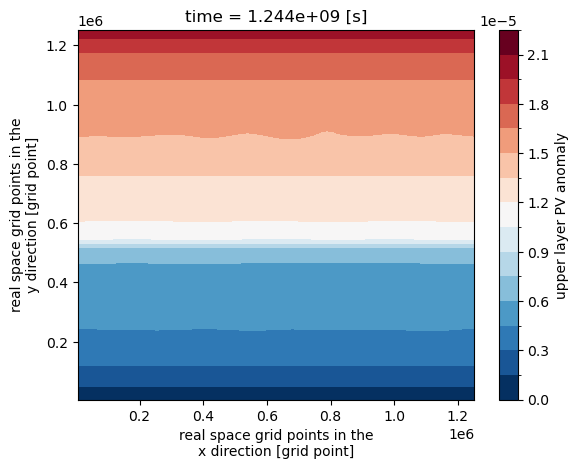

In [4]:
m_ds['q_upper'] = m_ds.q.isel(lev=0) + m_ds.Qy.isel(lev=0)*m_ds.y
m_ds['q_upper'].attrs = {'long_name': 'upper layer PV anomaly'}
m_ds.q_upper.plot.contourf(levels=18, cmap='RdBu_r');

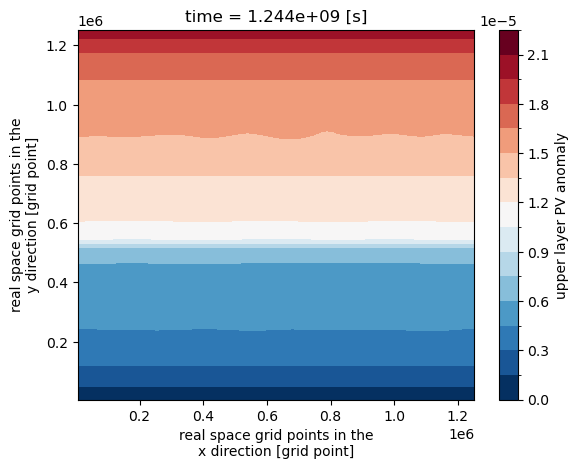

In [5]:
m_ds['q_lower'] = m_ds.q.isel(lev=1) + m_ds.Qy.isel(lev=1)*m_ds.y
m_ds['q_lower'].attrs = {'long_name': 'lower layer PV anomaly'}
m_ds.q_upper.plot.contourf(levels=18, cmap='RdBu_r');

In [43]:
m.describe_diagnostics()


NAME               | DESCRIPTION
--------------------------------------------------------------------------------
APEflux    | spectral flux of available potential energy           
APEgen     | total available potential energy generation           
APEgenspec | the spectrum of the rate of generation of available potential energy
Dissspec   | Spectral contribution of filter dissipation to total energy
EKE        | mean eddy kinetic energy                              
EKEdiss    | total energy dissipation by bottom drag               
ENSDissspec | Spectral contribution of filter dissipation to barotropic enstrophy
ENSflux    | barotropic enstrophy flux                             
ENSfrictionspec | the spectrum of the rate of dissipation of barotropic enstrophy due to bottom friction
ENSgenspec | the spectrum of the rate of generation of barotropic enstrophy
Ensspec    | enstrophy spectrum                                    
KEflux     | spectral flux of kinetic energy                

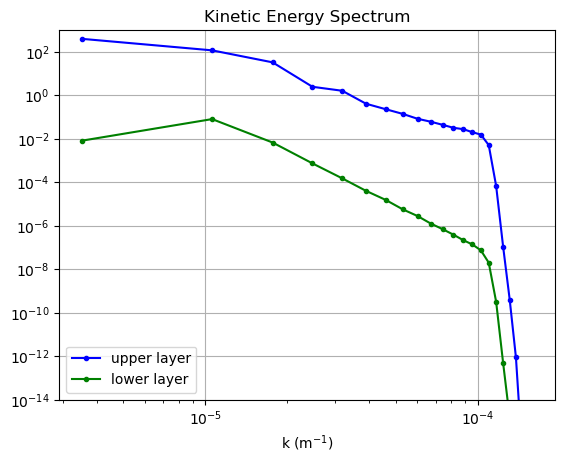

In [46]:
kr, kespec_upper = tools.calc_ispec(m, m_ds.KEspec.isel(lev=0).data)
_, kespec_lower = tools.calc_ispec(m, m_ds.KEspec.isel(lev=1).data)

plt.loglog(kr, kespec_upper, 'b.-', label='upper layer')
plt.loglog(kr, kespec_lower, 'g.-', label='lower layer')
plt.legend(loc='lower left')
plt.ylim([1e-14,1000])
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
plt.title('Kinetic Energy Spectrum');

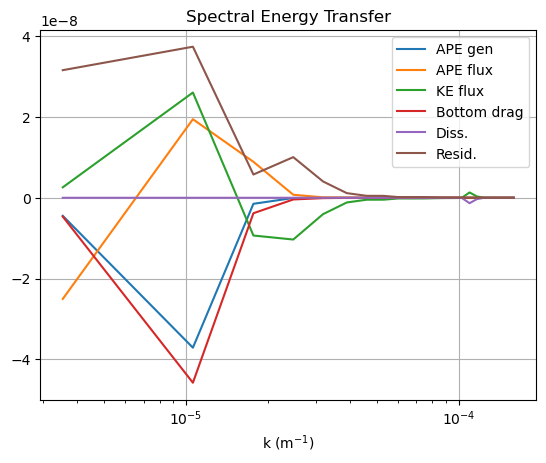

In [47]:
kr, APEgenspec = tools.calc_ispec(m, m_ds.APEgenspec.data)
_, APEflux     = tools.calc_ispec(m, m_ds.APEflux.data)
_, KEflux      = tools.calc_ispec(m, m_ds.KEflux.data)
_, KEfrictionspec = tools.calc_ispec(m, m_ds.KEfrictionspec.data)
_, Dissspec    = tools.calc_ispec(m, m_ds.Dissspec.data)

ebud = [ APEgenspec,
         APEflux,
         KEflux,
         KEfrictionspec,
         Dissspec]
ebud.append(-np.vstack(ebud).sum(axis=0))
ebud_labels = ['APE gen','APE flux','KE flux','Bottom drag','Diss.','Resid.']
[plt.semilogx(kr, term) for term in ebud]
plt.legend(ebud_labels, loc='upper right')
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
plt.title('Spectral Energy Transfer');

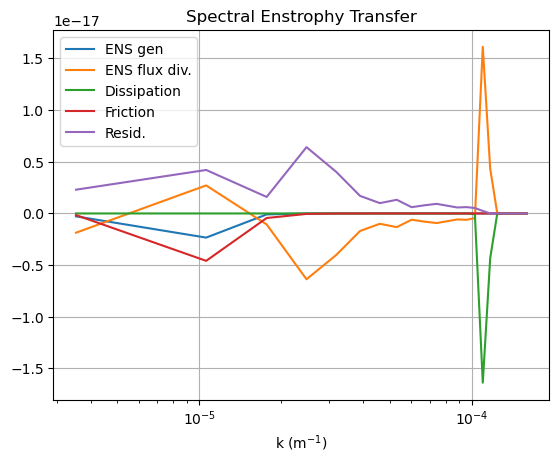

In [48]:
_, ENSflux    = tools.calc_ispec(m, m_ds.ENSflux.data.squeeze())
_, ENSgenspec = tools.calc_ispec(m, m_ds.ENSgenspec.data.squeeze())
_, ENSfrictionspec = tools.calc_ispec(m, m_ds.ENSfrictionspec.data.squeeze())
_, ENSDissspec = tools.calc_ispec(m, m_ds.ENSDissspec.data.squeeze())

ebud = [ ENSgenspec,
         ENSflux,
         ENSDissspec,
         ENSfrictionspec]
ebud.append(-np.vstack(ebud).sum(axis=0))
ebud_labels = ['ENS gen','ENS flux div.','Dissipation','Friction','Resid.']
[plt.semilogx(kr, term) for term in ebud]
plt.legend(ebud_labels, loc='best')
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
plt.title('Spectral Enstrophy Transfer');